# Langton's Ant

Daniel Koehn

Schwentinental, 26th of December 2020

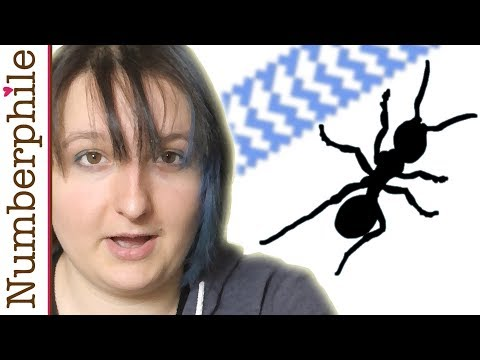

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('NWBToaXK5T0')

In [2]:
# Import libraries
import numpy
from matplotlib import pyplot

# import JIT from Numba
from numba import jit

In [3]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [4]:
# define parameters here
nx = 250
nz = 250

# Langton 's an initial position
I0 = (int)(nx/2)
J0 = (int)(nz/2)

# Maximum iteration
itermax = 40000

# Ant looks to ... 
# ... north ... ant_dir = 1
# ... east  ... ant_dir = 2
# ... south ... ant_dir = 3
# ... west  ... ant_dir = 4
ant_dir = 2

#### Let Langtons Ant crawl on the Cartesian grid

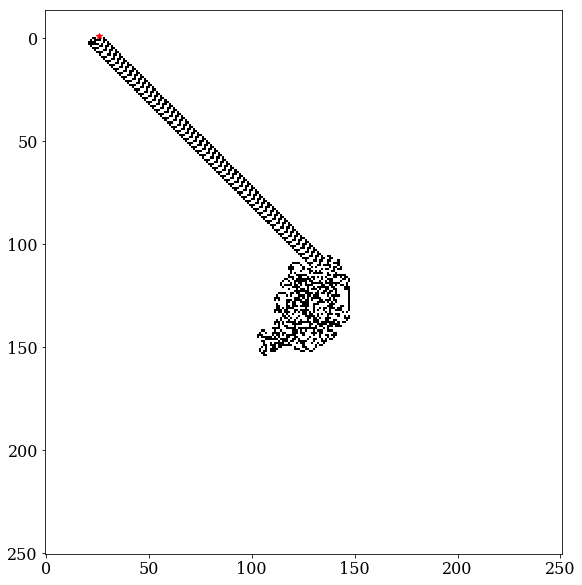

In [5]:
#%matplotlib notebook
ant_map = numpy.ones((nz+1,nx+1))

# Plot the initial state 
#fig = pyplot.figure(figsize=(10., 10.))
#pyplot.tight_layout()
#cmap = 'gray'
#im = pyplot.imshow(numpy.flipud(ant_map), interpolation='none', cmap=cmap, vmin=-1, vmax=1)
    
# activate interactive plot
#pyplot.ion()    
#pyplot.show(block=False)  

ant_x = I0
ant_z = J0
step = 0
for n in range(itermax):
    
    ant_x_old = ant_x
    ant_z_old = ant_z
    
    # check if we are still in the computation area
    if(ant_z < 0 or ant_z > nz):
        break
        
    if(ant_x < 0 or ant_x > nx):
        break
    
    if(ant_map[ant_z,ant_x]==1):
    
        if (ant_dir == 1 and step == 0):
            ant_x = ant_x + 1
            ant_dir = 2
            step = 1
            
        if (ant_dir == 2 and step == 0):
            ant_z = ant_z + 1
            ant_dir = 3
            step = 1
            
        if (ant_dir == 3 and step == 0):
            ant_x = ant_x - 1
            ant_dir = 4    
            step = 1
            
        if (ant_dir == 4 and step == 0):
            ant_z = ant_z - 1
            ant_dir = 1
            step = 1
    
    if(ant_map[ant_z,ant_x] == -1):
    
        if(ant_dir == 1 and step == 0):
            ant_x = ant_x - 1
            ant_dir = 4
            step = 1
            
        if(ant_dir == 2 and step == 0):
            ant_z = ant_z - 1
            ant_dir = 1
            step = 1
            
        if(ant_dir == 3 and step == 0):
            ant_x = ant_x + 1
            ant_dir = 2    
            step = 1
            
        if(ant_dir == 4 and step == 0):
            ant_z = ant_z + 1
            ant_dir = 3                    
            step = 1    
    
    ant_map[ant_z_old,ant_x_old] *= -1
    step=0
    
    #im.set_data(numpy.flipud(ant_map))
    #fig.canvas.draw()

# Plot final state    
fig = pyplot.figure(figsize=(15., 10.))
pyplot.tight_layout()
cmap = 'gray'
im = pyplot.imshow(ant_map, interpolation='none', cmap=cmap, vmin=-1, vmax=1)
pyplot.plot(ant_x,ant_z,'r*')

pyplot.savefig('langtons_ant.jpeg', bbox_inches='tight', dpi=150)
pyplot.show()